In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [4]:
data.loc[data.HouseYear==20052011,'HouseYear']=2008
data.loc[data.HouseYear==4968,'HouseYear']=1968

In [5]:
train,valid=train_test_split(data,test_size=0.3,random_state=42)

In [6]:
train.shape

(7000, 20)

In [7]:
valid.shape

(3000, 20)

In [8]:
scaler=MinMaxScaler()

In [9]:
train_scaled=scaler.fit_transform(train.loc[:,['HouseYear','DistrictId']])

In [10]:
train_scaled

array([[0.9537037 , 0.11004785],
       [0.60185185, 0.11004785],
       [0.68518519, 0.41626794],
       ...,
       [0.60185185, 0.00478469],
       [0.56481481, 0.44976077],
       [0.75      , 0.00956938]])

In [11]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=42)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

275.66445745306356
154.21399483107405
118.34653985063
89.93632943287
75.48717749672792
63.45340020671637
56.389720100191404
50.12616448078286


Text(0.5, 1.0, 'INERTIA')

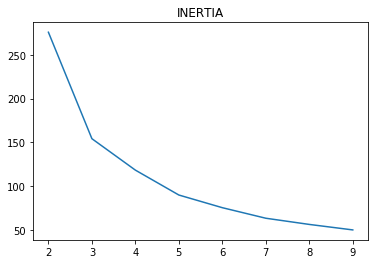

In [12]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA')

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
model=AgglomerativeClustering(n_clusters=5)

In [15]:
train['cluster_year']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'TRAIN')

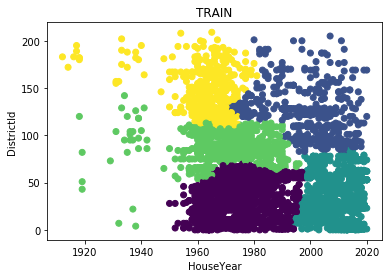

In [16]:
plt.scatter(train['HouseYear'],train['DistrictId'],c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('TRAIN')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 21 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3642 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
cluster_year     7000 non-null int64
dtypes: float64(8), int64(10), object(3)
memory usage: 1.2+ MB


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors=5)

In [20]:
%%time
knn.fit(train_scaled,train['cluster_year'])

Wall time: 5.58 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
valid_scaled=scaler.transform(valid.loc[:,['HouseYear','DistrictId']])

In [22]:
valid['cluster_year']=knn.predict(valid_scaled)

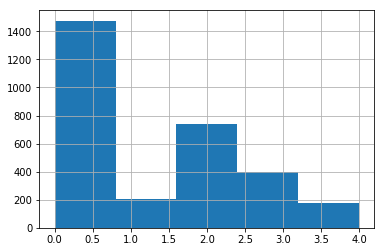

In [23]:
valid['cluster_year'].hist(bins=5)

In [24]:
distr_info1=train['DistrictId'].value_counts().reset_index().rename(columns=({'DistrictId':'large_district','index':'DistrictId'}))

In [25]:
distr_info1['is_large']=(distr_info1['large_district']>100).astype(int)

In [26]:
distr_info1.head(10)

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1
5,62,175,1
6,30,160,1
7,53,133,1
8,58,118,1
9,21,107,1


In [27]:
def add_distr_info(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [28]:
price=train['Price'].mean()
price

214449.16738970255

In [29]:
price_mean_by_rooms=train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_rooms

,Rooms,mean_price_by_rooms
0,0.0,184599.160110
1,1.0,160134.810901
2,2.0,215287.628931
3,3.0,290867.452543
4,4.0,385776.526291
5,5.0,386743.536446
6,6.0,229661.964416
7,10.0,317265.323792
8,19.0,78364.616704


In [30]:
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_dr'})
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_by_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,147116.367405
4,1,2.0,198775.648383


In [31]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left')
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
    return df

In [32]:
def prepare_data(df,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=add_distr_info(df,distr_info1)
    df=add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price)
    return df

In [33]:
train=prepare_data(train,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 25 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             5514 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Ecology_2              7000 non-null object
Ecology_3              7000 non-null object
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Healthcare_1           3642 non-null float64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Shops_2                7000 non-null object
Price                  7000 non-null float64
cluster_year  

In [35]:
def dummies(df,feature='cluster_year'):
    df[feature]=df[feature].astype(object)
    df=pd.get_dummies(df)
    return df

In [36]:
train=dummies(train)

In [37]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_year_0', 'cluster_year_1', 'cluster_year_2',
       'cluster_year_3', 'cluster_year_4'],
      dtype='object')

In [38]:
feats=['large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'cluster_year_0', 'cluster_year_1', 'cluster_year_2','cluster_year_3', 'cluster_year_4']

In [39]:
from sklearn.ensemble import RandomForestRegressor as RF

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params={'min_samples_leaf':[3,5,7,10],
        'n_estimators':[25,50,75,100],
        'max_depth':[3,5,7]
       }
regr=GridSearchCV(RF(),param_grid=params,cv=2)

In [42]:
%%time
regr.fit(train.loc[:,feats],train['Price'])

Wall time: 12.5 s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 5, 7, 10], 'n_estimators': [25, 50, 75, 100], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
regr.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 50}

In [44]:
regr.best_score_

0.6699155033306213

In [45]:
RFR=RF(max_depth= 5, min_samples_leaf=10, n_estimators=50,random_state=42)

In [46]:
%%time
RFR.fit(train.loc[:,feats],train['Price'])

Wall time: 150 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
for i,j in zip(feats,RFR.feature_importances_):
    print(i,j)

large_district 0.0052280363867311715
is_large 0.00012812105417037508
mean_price_by_dr 0.9655127316717728
mean_price_by_rooms 0.000544614729770153
cluster_year_0 0.003748870797267721
cluster_year_1 0.005897631047227322
cluster_year_2 0.018524121920471013
cluster_year_3 0.0002834260171470628
cluster_year_4 0.00013244637544268038


In [47]:
valid=prepare_data(valid,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [48]:
valid=dummies(valid)

In [49]:
y_pred=RFR.predict(valid.loc[:,feats])

In [50]:
from sklearn.metrics import r2_score as r2

In [51]:
r2(valid['Price'],y_pred)

0.5467645224773321

In [52]:
r2(train['Price'],RFR.predict(train.loc[:,feats]))

0.6894284039041934

In [53]:
test_scaled=scaler.transform(test.loc[:,['HouseYear','DistrictId']])
test['cluster_year']=knn.predict(test_scaled)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
cluster_year     5000 non-null int64
dtypes: float64(7), int64(10), object(3)
memory usage: 781.3+ KB


In [55]:
test=prepare_data(test,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)
test=dummies(test)

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 31 columns):
Id                     5000 non-null int64
DistrictId             5000 non-null int64
Rooms                  5000 non-null float64
Square                 5000 non-null float64
LifeSquare             3959 non-null float64
KitchenSquare          5000 non-null float64
Floor                  5000 non-null int64
HouseFloor             5000 non-null float64
HouseYear              5000 non-null int64
Ecology_1              5000 non-null float64
Social_1               5000 non-null int64
Social_2               5000 non-null int64
Social_3               5000 non-null int64
Healthcare_1           2623 non-null float64
Helthcare_2            5000 non-null int64
Shops_1                5000 non-null int64
large_district         5000 non-null float64
is_large               5000 non-null float64
mean_price_by_dr       5000 non-null float64
mean_price_by_rooms    5000 non-null float64
Ecology_2_A

In [57]:
test['Price']=RFR.predict(test.loc[:,feats])

In [58]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3,cluster_year_4,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,1,0,1,1,0,0,0,0,169705.642411
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,0,1,0,1,0,0,0,1,0,232429.019164
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,0,1,0,1,0,0,0,0,1,161076.268500
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,1,0,1,0,0,1,0,0,201789.786174
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,0,1,1,0,0,0,1,0,0,126073.508512


In [60]:
test[['Id','Price']].to_csv('PNagornyi_predictions.csv',index=None)